# Traffic-Aware and Energy-Efficiency Network

## Dataset Input

Dataset:
the telecommunication activity in the city of Milan and in the Province of Trentino.
* paper: A multi-source dataset of urban life in the city of Milan and the Province of Trentino
* src: https://doi.org/10.7910/DVN/EGZHFV
* Format: 
    - Square id
    - Time Interval
    - Country code
    - SMS-in activity
    - SMS-out activity
    - Call-in activity
    - Call-out activity
    - Internet traffic activity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
from PyEMD import EMD
import warnings
warnings.filterwarnings("ignore")

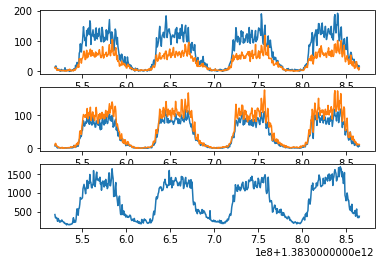

In [2]:
data = pd.read_csv("C:/LiGu/LiGu_Works/.other/流量工程/work/6164.txt",header=None, sep = '\t')
data.columns = ['SquareID', 'Time', 'CountryCode', 'SMSIn', 'SMSOut', 'CallIn', 'CallOut', 'Internet']
data = data.fillna(0)

data1 = data.groupby(['Time'])

fig, ax = plt.subplots(3, 1)
ax[0].plot(data1['SMSIn'].sum())
ax[0].plot(data1['SMSOut'].sum())
ax[1].plot(data1['CallIn'].sum())
ax[1].plot(data1['CallOut'].sum())
ax[2].plot(data1['Internet'].sum())

data11 = data1['SMSIn'].sum()

## Empirical Mode Decomposition

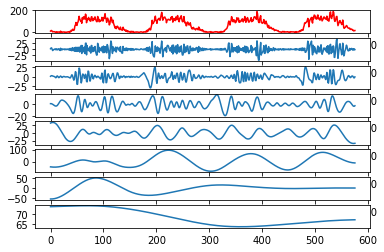

In [3]:
emd = EMD()
IMFs = emd(np.array(list(data11)))

fig, ax = plt.subplots(np.size(IMFs,0)+1, 1)
for i in range(np.size(IMFs,0)):
    ax[i+1].plot(IMFs[i])
ax[0].plot(np.sum(IMFs, axis=0), 'r')

FFT

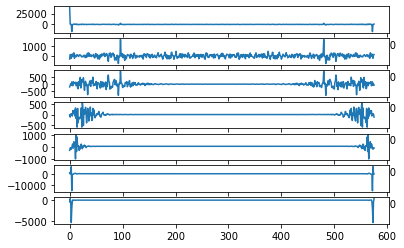

In [4]:
fig, ax = plt.subplots(np.size(IMFs,0), 1)
for i in range(np.size(IMFs,0)-1):
    ax[i+1].plot(np.fft.fft(IMFs[i]))
ax[0].plot(np.fft.fft(np.sum(IMFs, axis=0)))

## ARIMA (Autoregressive Integrated Moving Average model)

differential, ADF-Test  
set $d = 1$

timeseries_adf :  (-3.845141061092611, 0.0024777990966403382, 18, 557, {'1%': -3.4421447800270673, '5%': -2.8667429272780858, '10%': -2.5695409929766093}, 4582.698116291983)
timeseries_diff_adf :  (-4.381220255082909, 0.000320391176764157, 14, 561, {'1%': -3.442060292264578, '5%': -2.866705729876777, '10%': -2.569521171354946}, 4594.470185598779)
timeseries_diff2_adf :  (-10.107884455410202, 1.0184868217489116e-17, 18, 557, {'1%': -3.4421447800270673, '5%': -2.8667429272780858, '10%': -2.5695409929766093}, 4605.103653293372)


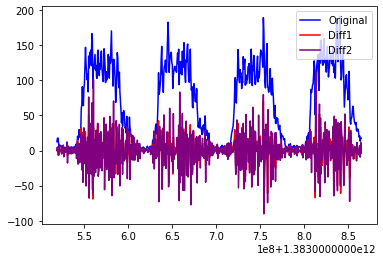

In [102]:
data11_diff  = data11.diff(1).fillna(0)
data11_diff2 = data11_diff.diff(1).fillna(0)

print('timeseries_adf : ', ADF(data11.tolist()))
print('timeseries_diff_adf : ', ADF(data11_diff.tolist()))
print('timeseries_diff2_adf : ', ADF(data11_diff2.tolist()))

plt.plot(data11, label='Original', color='blue')
plt.plot(data11_diff, label='Diff1', color='red')
plt.plot(data11_diff2, label='Diff2', color='purple')
plt.legend(loc=1)
plt.show()

ACF、PACF  

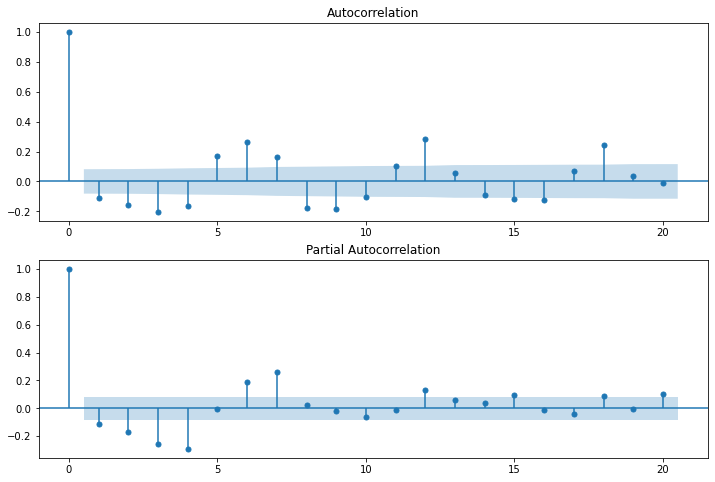

In [35]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(data11.diff(1).fillna(0), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(data11.diff(1).fillna(0), lags=20, ax=ax2)
plt.show()

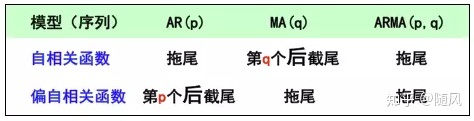
通过拖尾和截尾对模型定阶，具有很强的主观性。回顾一下我们对于模型参数估计得方法，是通过对损失和正则项的加权评估。我们在参数选择的时候，需要平衡预测误差与模型复杂度。我们可以根据信息准则函数法，来确定模型的阶数。

adf :  (-6.400670801969512, 1.9992281996085333e-08, 11, 564, {'1%': -3.4419977165341673, '5%': -2.866678179017994, '10%': -2.5695064902419396}, 4221.097748422222)
diff_adf :  (-10.049264491637947, 1.4268619205551393e-17, 18, 556, {'1%': -3.4421660928041633, '5%': -2.8667523104859627, '10%': -2.56954599309042}, 4242.531391391049)
adf :  (-9.616934974624579, 1.750217509908105e-16, 11, 564, {'1%': -3.4419977165341673, '5%': -2.866678179017994, '10%': -2.5695064902419396}, 2350.8424490536863)
diff_adf :  (-10.09798904422824, 1.0780789562889534e-17, 19, 555, {'1%': -3.44218748274498, '5%': -2.8667617276005006, '10%': -2.569551011281552}, 2394.269112575007)
adf :  (-8.099551551363843, 1.3110315113316623e-12, 11, 564, {'1%': -3.4419977165341673, '5%': -2.866678179017994, '10%': -2.5695064902419396}, -533.468690204078)
diff_adf :  (-9.631356008160699, 1.6090101547121852e-16, 13, 561, {'1%': -3.442060292264578, '5%': -2.866705729876777, '10%': -2.569521171354946}, -484.2303143155873)
adf :  (-3

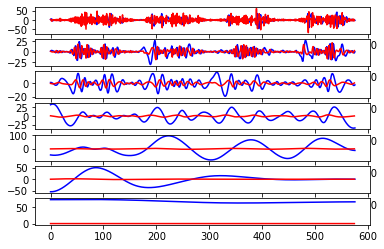

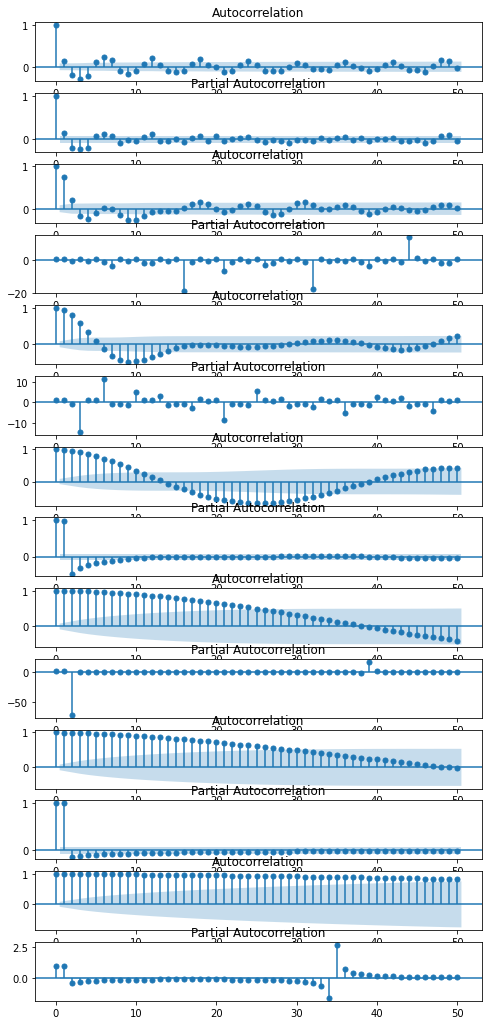

In [107]:
fig, axDiff = plt.subplots(np.size(IMFs,0), 1)
fig,axAcf = plt.subplots(2 * np.size(IMFs,0), 1, figsize = (8,18))

for i in range(np.size(IMFs,0)):
    diff  = np.nan_to_num(np.diff(IMFs[i]), nan = 0)

    print('adf : ', ADF(IMFs[i].tolist()))
    print('diff_adf : ', ADF(diff.tolist()))
    axDiff[i].plot(IMFs[i], label='Original', color='blue')
    axDiff[i].plot(diff, label='Diff1', color='red')

    sm.graphics.tsa.plot_acf (IMFs[i], lags=50, ax=axAcf[2 * i + 0])
    sm.graphics.tsa.plot_pacf(IMFs[i], lags=50, ax=axAcf[2 * i + 1])

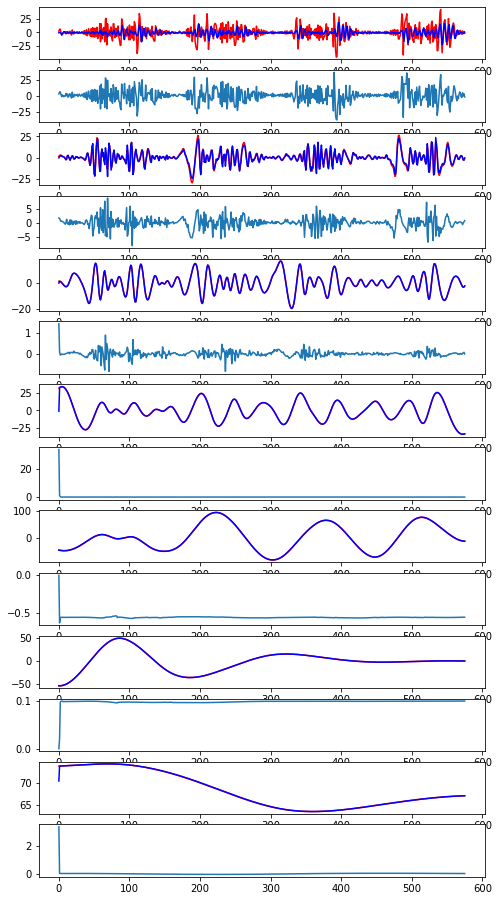

In [157]:
fitSeq0 = np.zeros([np.size(IMFs,1)])
fig, ax = plt.subplots(2 * np.size(IMFs,0), 1, figsize = (8, 16))

IMFsOrder = [
    (2,0,4),(2,0,2),(4,0,4),(4,0,4),
    (4,1,4),(4,1,4),(1,0,0)
]

for i in range(np.size(IMFsOrder,0)):
    model = ARIMA(np.array(list(IMFs[i])), IMFsOrder[i]).fit(disp=0)
    trend_fit_seq = model.fittedvalues

    if(IMFsOrder[i][1] != 0):
        trend_fit_seq = np.append(IMFs[i][0], trend_fit_seq)
        trend_fit_seq = np.cumsum(trend_fit_seq)
        
    ax[2 * i].plot(IMFs[i], 'r')
    ax[2 * i].plot(trend_fit_seq, 'b')
    ax[2 * i + 1].plot(IMFs[i] - trend_fit_seq)
    
    fitSeq0 = fitSeq0 + trend_fit_seq

Fitting Performance

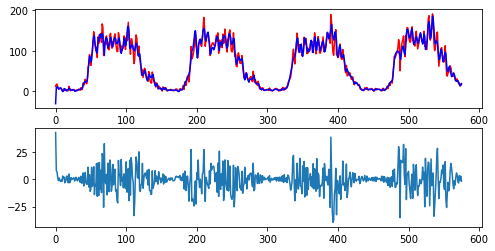

In [158]:
fig, ax = plt.subplots(2, 1, figsize = (8, 4))
ax[0].plot(data11.tolist(), 'r')
ax[0].plot(fitSeq0, 'b')
ax[1].plot(data11.tolist() - fitSeq0)

## Result of Predict